In [31]:
## Python ≥3.5 is required
#import sys
#assert sys.version_info >= (3, 5)

## Scikit-Learn ≥0.20 is required
#import sklearn
#assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

#if not tf.test.is_gpu_available():
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [32]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [33]:
(X_train_full, y_train_full), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_train1, X_train2 = X_train_full[:-1000], X_train_full[-1000:]
y_train2 = y_train_full[-1000:]

In [34]:
print(len(X_train_full))
print(len(y_train_full))
print(len(X_valid))
print(len(y_valid))
print(len(X_train1))
print(len(X_train2))
print(len(y_train2))

y_valid

60000
60000
10000
10000
59000
1000
1000


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
#Check the shape of the dataset
print(X_train_full.shape)
print(y_train_full.shape)
print(X_valid.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


Question 2: Display sample images dataset from the training dataset in 6 x 8 grid. 

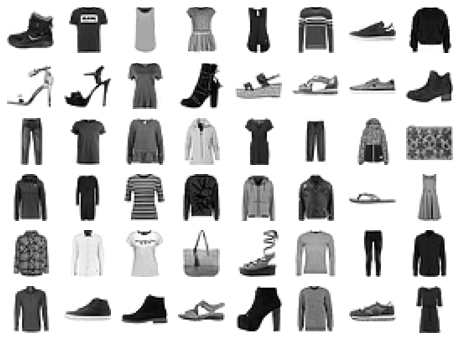

In [21]:
plt.figure(figsize=(8, 6))
for index, position in enumerate(X_train1[:48]):
  plt.subplot(6, 8, index + 1)
  plt.imshow(position, cmap="binary")
  plt.axis('off')

In [22]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

Question 3: Mode1#1 train a deep (using Convolutional Layers) denoising autoencoder using X_train1 and X_valid. Train it for atleast 20 Epochs.

In [36]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train1, X_train1, epochs=20,
                      validation_data=(X_valid, X_valid))

Epoch 1/20
1844/1844 [==============================] - 10s 5ms/step - loss: 0.3394 - rounded_accuracy: 0.8886 - val_loss: 0.2823 - val_rounded_accuracy: 0.9369
Epoch 2/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2822 - rounded_accuracy: 0.9356 - val_loss: 0.2772 - val_rounded_accuracy: 0.9432
Epoch 3/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2776 - rounded_accuracy: 0.9401 - val_loss: 0.2741 - val_rounded_accuracy: 0.9460
Epoch 4/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2751 - rounded_accuracy: 0.9429 - val_loss: 0.2773 - val_rounded_accuracy: 0.9413
Epoch 5/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2750 - rounded_accuracy: 0.9441 - val_loss: 0.2707 - val_rounded_accuracy: 0.9500
Epoch 6/20
1844/1844 [==============================] - 9s 5ms/step - loss: 0.2733 - rounded_accuracy: 0.9453 - val_loss: 0.2750 - val_rounded_accuracy: 0.9449
Epoch 7/20
1844/1844 [=================

Question 4: Extract the trained encoder part of the Model1 trained in step3 and add two consecutive dense layers using activation =selu and actiation = softmax activation function- the first dense layer will have 30 nodes. 

In [37]:
conv_encoder_clone  = keras.models.clone_model(conv_encoder)
conv_encoder_clone.trainable = False
model2 = keras.models.Sequential([
    conv_encoder_clone,
    keras.layers.Flatten(), 
    keras.layers.Dense(30, activation="selu"), 
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.02),
metrics=["accuracy"])

Question 5: Train model 2 using training dataset: [Xtrain2(1000), ytrain2(1000)] and validation data set for 20 Epoch. Return the training in "history" variable and plot the training graph using "history" and DataFrame. 

In [27]:
history_model2 = model2.fit(X_train2, y_train2, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
32/32 [==============================] - 1s 30ms/step - loss: 2.1946 - accuracy: 0.2466 - val_loss: 1.9294 - val_accuracy: 0.3507
Epoch 2/20
32/32 [==============================] - 1s 25ms/step - loss: 1.8459 - accuracy: 0.4887 - val_loss: 1.7457 - val_accuracy: 0.4797
Epoch 3/20
32/32 [==============================] - 1s 23ms/step - loss: 1.6580 - accuracy: 0.5611 - val_loss: 1.5345 - val_accuracy: 0.5618
Epoch 4/20
32/32 [==============================] - 1s 23ms/step - loss: 1.4714 - accuracy: 0.6013 - val_loss: 1.4181 - val_accuracy: 0.5513
Epoch 5/20
32/32 [==============================] - 1s 25ms/step - loss: 1.3313 - accuracy: 0.6604 - val_loss: 1.3624 - val_accuracy: 0.5608
Epoch 6/20
32/32 [==============================] - 1s 24ms/step - loss: 1.2586 - accuracy: 0.6350 - val_loss: 1.2691 - val_accuracy: 0.6122
Epoch 7/20
32/32 [==============================] - 1s 25ms/step - loss: 1.1781 - accuracy: 0.6982 - val_loss: 1.2177 - val_accuracy: 0.6113
Epoch 8/20
32

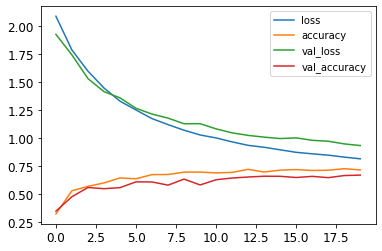

In [28]:
#plot
import pandas as pd
pd.DataFrame(history_model2.history) .plot()
plt.show()

Question 6 Rebuild Model2 and Model3 without including the trained weight of the encoder of Model 1 and repeat the step as done in 5

In [39]:
model3 = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(), 
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.02),
metrics=["accuracy"])

history_model3 = model3.fit(X_train2, y_train2, epochs=20,
                      validation_data=(X_valid, y_valid))

Epoch 1/20
32/32 [==============================] - 1s 32ms/step - loss: 2.1244 - accuracy: 0.2744 - val_loss: 1.7852 - val_accuracy: 0.3540
Epoch 2/20
32/32 [==============================] - 1s 24ms/step - loss: 1.3180 - accuracy: 0.5608 - val_loss: 1.8256 - val_accuracy: 0.4924
Epoch 3/20
32/32 [==============================] - 1s 23ms/step - loss: 1.1202 - accuracy: 0.6155 - val_loss: 0.9196 - val_accuracy: 0.6633
Epoch 4/20
32/32 [==============================] - 1s 24ms/step - loss: 0.8684 - accuracy: 0.6928 - val_loss: 1.0883 - val_accuracy: 0.6214
Epoch 5/20
32/32 [==============================] - 1s 25ms/step - loss: 0.7686 - accuracy: 0.7179 - val_loss: 1.2205 - val_accuracy: 0.5888
Epoch 6/20
32/32 [==============================] - 1s 24ms/step - loss: 0.7700 - accuracy: 0.7199 - val_loss: 0.7862 - val_accuracy: 0.7042
Epoch 7/20
32/32 [==============================] - 1s 26ms/step - loss: 0.6671 - accuracy: 0.7683 - val_loss: 0.7831 - val_accuracy: 0.7218
Epoch 8/20
32

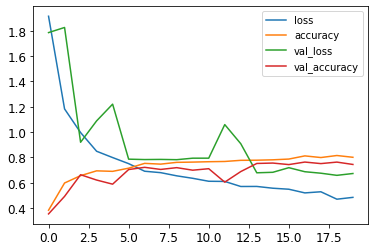

In [40]:
#plot
import pandas as pd
pd.DataFrame(history_model3.history) .plot()
plt.show()

Question 7: Comment on the validation accuracies of Model 2 and Model 3


Validation Accuracy of the Model2 = 0.6726
Validation Accuracy of the Model3 = 0.7444